 # Assignemnt 1. Clustering  </span>


 ## Part 0. Loading the Data and Initial Data Manipulation </span>

In [1]:
# Loading required libraries

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import time

In [2]:
# Opening data in pandas dataframe object

data = pd.read_json('tweets (1).json')
data = data[['lng', 'lat', 'id', 'timeStamp', 'text']] 
data.head()

,lng,lat,id,timeStamp,text
0,-121.883557,37.446100,377652254096228352,2013-09-11 04:38:08+00:00,@Tanner_Cortez hey checkout the website: http:...
1,-117.462604,34.087406,377652255346159616,2013-09-11 04:38:08+00:00,@Lennayy7 😪
2,-121.842867,37.356131,377652262325456897,2013-09-11 04:38:10+00:00,i laugh a lot with that line
3,-122.009629,37.364664,377652264682655744,2013-09-11 04:38:11+00:00,sons of anarchy is back on woop woop
4,-121.995000,37.382600,377652271116722176,2013-09-11 04:38:12+00:00,Drinking a Fresh Squeezed IPA by @deschutesbee...


## Part 1. Visualization </span>

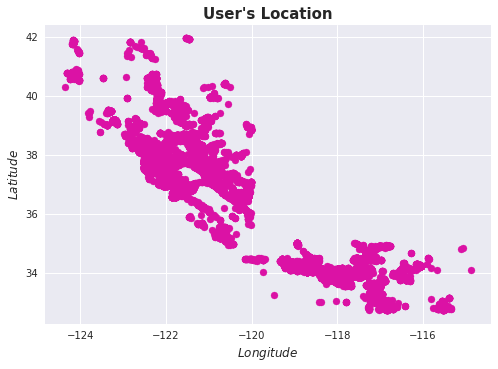

0.36591672897338867


In [6]:
# visualizing data points and its Execution time

start = time.time()

plt.style.use('seaborn')
plt.scatter(data['lng'], data['lat'], c='#db12a5')
plt.xlabel('$Longitude$', fontsize=12)
plt.ylabel('$Latitude$', fontsize=12)
plt.title("User's Location", fontsize=15, fontweight="bold")
plt.show()

end = time.time()
print(end-start)

 # Part 2. Calculate data points density </span>

In [5]:
# centroid Coordiante (Based on the last digit of my id which is 2)

cent_lat = 35.64882595915578
cent_lng = -120.85374495176804

In [6]:
# importing haversine for distance calculation

from haversine import haversine

In [7]:
# Defining a function for using haversine 

def hv(lat1,lng1,lat2,lng2, unit):
    return haversine((lat1,lng1),(lat2,lng2),unit=unit) 

In [8]:
# Calculating distance of each data point from centroid

data['dist_from_centroid'] = data[['lat','lng']].apply(lambda x: hv(cent_lat,cent_lng, x[0],x[1], unit='km'), axis=1)

In [9]:
# Number of data point within 50km radius of centroid

len(data[data['dist_from_centroid'] <=50])

249

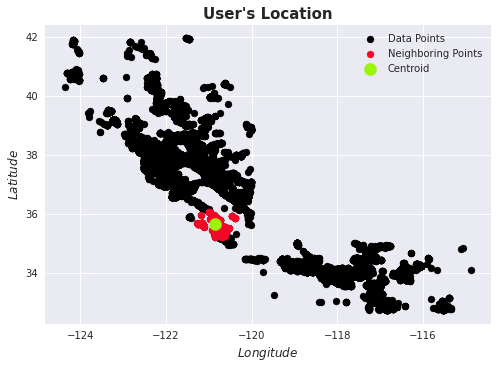

In [29]:
# plotting the centroid and its 5okm vicinity 

plt.style.use('seaborn')
plt.scatter(data['lng'], data['lat'], c='k', label='Data Points')

plt.scatter(data[data['dist_from_centroid'] <=50].lng, data[data['dist_from_centroid'] <=50].lat, c='#f50727', label='Neighboring Points')
plt.scatter(cent_lng , cent_lat,  c='#9af507', s=150, label='Centroid')


plt.xlabel('$Longitude$', fontsize=12)
plt.ylabel('$Latitude$', fontsize=12)
plt.title("User's Location", fontsize=15, fontweight="bold")
plt.legend()
plt.savefig('Neighboring.png', dpi=1200)


 # Part 3. Clustering Algorithms </span>

 ## Part 3.1  K-means Algorithm </span>

### Part 3.1.0  Reprojecting Coordinate System </span>

In [10]:
# Reporjecting Coordinate System 

# Defining Origin of the new coordinate system
org_lng = data['lng'].min()
org_lat = data['lat'].min()

# Converting location from degree coordinates to meter
## The distances are converted to 10^6 meter scale in order to do better interpretation of the next step's reuslt.

data['dist_lat'] = data['lat'].apply(lambda x: hv(org_lat,org_lng, x,org_lng, unit='km'))/1000
data['dist_lng'] = data['lng'].apply(lambda x: hv(org_lat,org_lng, org_lat,x, unit='km'))/1000

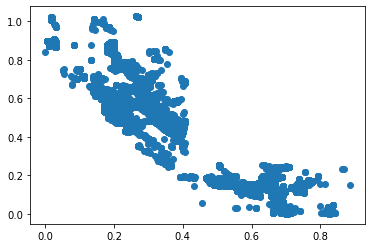

In [11]:
# plotting the reprojected data and to check its validity

plt.scatter(data['dist_lng'], data['dist_lat'])
plt.show()

### Part 3.1.1 Applying K-means to the data ponints </span>

In [12]:
# X varibale : coordinate of each data points 

X = data[['dist_lng', 'dist_lat']].values

In [12]:
# import K-means class from the Scikit-Learn Library

from sklearn.cluster import KMeans

In [41]:
# Applying K-means to the dataset
## assuming that K=10 

k_assumption = 10
kmeans_assumption = KMeans(n_clusters=k_assumption)
kmeans_assumption.fit(X)


KMeans(n_clusters=10)

### Part 3.1.2 Clustering with K=100 </span>

In [43]:
# Applying K-means to the dataset with K=10 and computing its execution time

k=100

start = time.time()

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

end = time.time()
print(end-start)

12.355085611343384


In [44]:
# computing execution time with more accurate approach

%timeit KMeans(n_clusters=100, random_state=42).fit(X)

11.1 s ± 417 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Part 3.1.3 Maximum number of clusters </span>

In [68]:
# defining a function that computes execution time for different number of clusters

def exec_time(k):
    start = time.time()

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    end = time.time()
    return end-start

In [76]:
# computing the execution time with different number of clusters

times = [exec_time(k) for k in range(1,351,25)]

# Don't Run this, it may take about 3 minutes to execute.

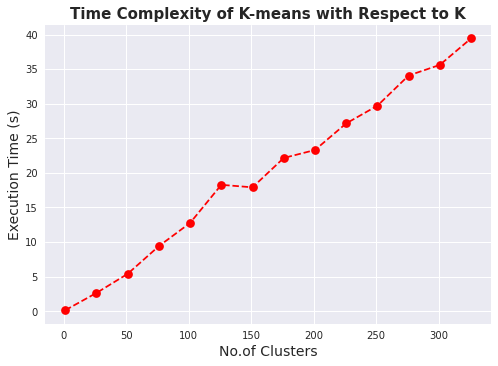

In [84]:
plt.plot(range(1,351,25), times, 'r.--', markersize=17.5)
plt.xlabel('No.of Clusters', fontsize=14)
plt.ylabel('Execution Time (s)', fontsize=14)
plt.title('Time Complexity of K-means with Respect to K', fontsize=15, fontweight="bold")
#plt.savefig('Time_complex_kmeans.png', dpi=1500)
plt.show()

In [119]:
# Estimating execution time for different number of cluster 

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(k_num.reshape(-1,1), np.array(times))
lin_reg.intercept_, lin_reg.coef_

(0.23484223554423167, array([0.11999052]))

In [124]:
# Estimating execution time based on above linear regression model

estimated_time = lin_reg.predict(np.arange(0,100000,100).reshape(-1,1))

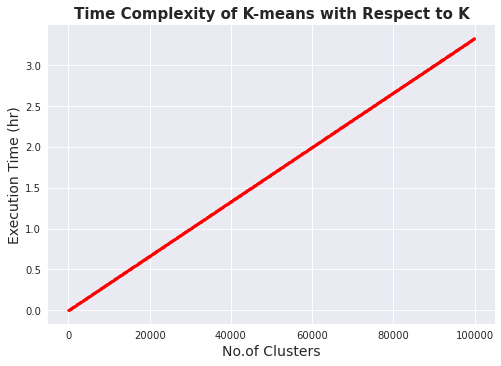

In [132]:
# Plotting the execution time

plt.plot(np.arange(0,100000,100), estimated_time/3600, 'r.--', markersize=5)

plt.xlabel('No.of Clusters', fontsize=14)
plt.ylabel('Execution Time (hr)', fontsize=14)
plt.title('Time Complexity of K-means with Respect to K', fontsize=15, fontweight="bold")
#plt.savefig('Est_Time_kmeans.png', dpi=1500)
plt.show()

###  Part 3.1.4 Optimum number of clusters </span>

In [135]:
# Computing inertia for different number of clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(25,401,25)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Don't Run this, it may take about 5 minutes to execute.

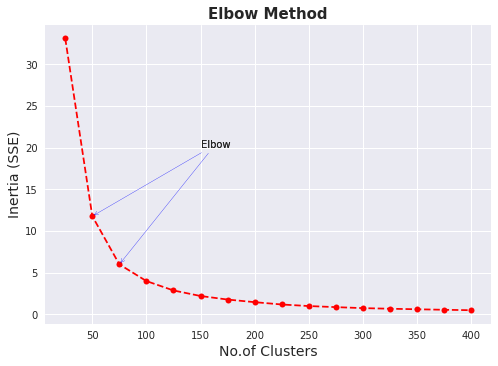

In [161]:
# Elbow Method

plt.plot(range(25,401,25), inertias, 'r.--', markersize=12)
plt.xlabel('No.of Clusters', fontsize=14)
plt.ylabel('Inertia (SSE)',fontsize=14)
plt.title('Elbow Method', fontsize=15, fontweight="bold")
plt.annotate('Elbow', xy=(50,inertias[1]),
             xytext=(150,20),
             arrowprops={'arrowstyle':'->', 'color' : 'blue'})
plt.annotate('Elbow', xy=(75,inertias[2]),
             xytext=(150,20),
             arrowprops={'arrowstyle':'->', 'color' : 'blue'})
plt.savefig('elbow.png', dpi=1500)
plt.show()

In [17]:
# Relative Measure for Culstering Validation using Silhouette coefficient

from sklearn.metrics import silhouette_score 

In [164]:
# Silhouette coefficient for K=50

silhouette_score(X, KMeans(n_clusters=50, random_state=42).fit(X).labels_)

# Don't Run this, it may take about 5 minutes to execute.

0.5351539289170328

In [165]:
# Silhouette coefficient for K=75

silhouette_score(X, KMeans(n_clusters=75, random_state=42).fit(X).labels_)

# Don't Run this, it may take about 5 minutes to execute.

0.5354868434348565

In [14]:
# Clustering result for k = 75 

k = 75
kmeans_75 = KMeans(n_clusters=k)
kmeans_75.fit(X)

KMeans(n_clusters=75)

In [15]:
df_75 = pd.DataFrame({'lng' : X[:,0],
                   'lat' : X[:,1],
                   'label' : kmeans_75.labels_})

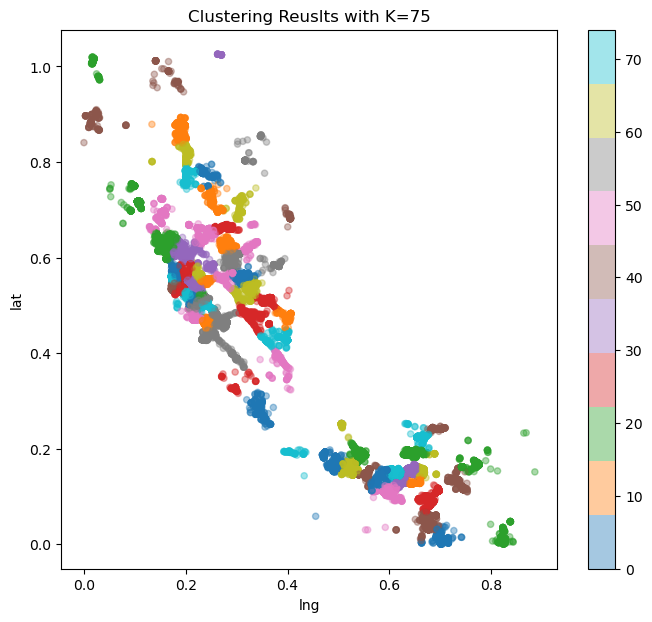

In [18]:
# plotting the result of clusters with k =75
plt.style.use('default')
df_75.plot(kind="scatter", x="lng", y="lat", alpha=0.4, title='Clustering Reuslts with K=75',
              figsize=(8,7),
             c=df_75["label"], cmap=plt.get_cmap("tab10"), colorbar=True,
             sharex=False)
plt.savefig('result_kmeans_75.png', dpi=1500)
plt.show()

In [14]:
# Computing inertia for smaller value of k (k = (9,12,15,...52))

kmeans_per_k_1 = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(9,52,3)]
inertias_1 = [model.inertia_ for model in kmeans_per_k_1]

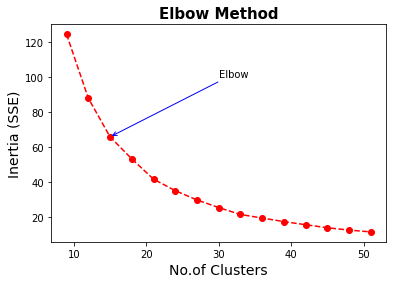

In [21]:
# plotting the inertia for smaller value of k

plt.plot(range(9,52,3), inertias_1, 'r.--', markersize=12)
plt.xlabel('No.of Clusters', fontsize=14)
plt.ylabel('Inertia (SSE)',fontsize=14)
plt.title('Elbow Method', fontsize=15, fontweight="bold")

plt.annotate('Elbow', xy=(15,inertias_1[2]),
             xytext=(30,100),
             arrowprops={'arrowstyle':'->', 'color' : 'blue'})

plt.savefig('elbow_smallerK.png', dpi=1500)
plt.show()

In [18]:
# computing silhouette_score for k=15

silhouette_score(X, KMeans(n_clusters=15, random_state=42).fit(X).labels_)

0.5209169088587667

In [19]:
# Loading the counties center data

counties = pd.read_csv('counties.csv', usecols=['county_center_lng_x', 'county_center_lat_y'])

counties.head()

counties['dist_lat_county'] = counties['county_center_lat_y'].apply(lambda x: hv(org_lat,org_lng, x,org_lng, unit='km'))/1000

counties['dist_lng_county'] = counties['county_center_lng_x'].apply(lambda x: hv(org_lat,org_lng, org_lat,x, unit='km'))/1000

In [20]:
# counties centers coordinates

county_cent = counties[['dist_lng_county', 'dist_lat_county']].values

In [170]:
# Silhouette coefficient for K=58 and taking counties center as intial centroids

silhouette_score(X,KMeans(n_clusters=len(county_cent), init=county_cent, n_init=1, algorithm='elkan').fit(X).labels_)

0.5511617237279225

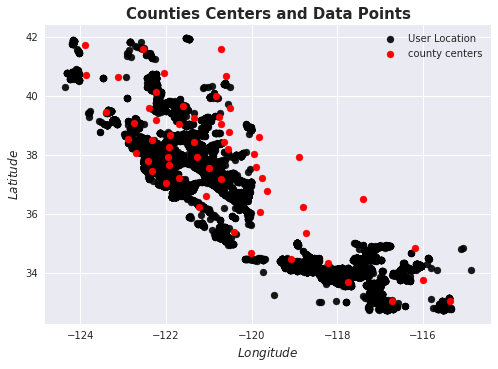

In [173]:
# plotting the counties center with data points

plt.style.use('seaborn')
plt.scatter(data['lng'], data['lat'], c='k', alpha =0.9, label = 'User Location')

plt.scatter(counties.county_center_lng_x, counties.county_center_lat_y, c='red', label = 'county centers') 

plt.xlabel('$Longitude$', fontsize=12)
plt.ylabel('$Latitude$', fontsize=12)
plt.title("Counties Centers and Data Points", fontsize=15, fontweight="bold")
plt.legend()
plt.savefig('counties.png', dpi=1500)
plt.show()

In [21]:
# clustering with counties center

kmeans_county = KMeans(n_clusters=len(county_cent), init=county_cent, n_init=1, algorithm='elkan')

start = time.time()

kmeans_county.fit(X)

end = time.time()
print(end-start) 

0.46819281578063965


In [25]:
# creating dataframe of data points with their cluster label

df_county = pd.DataFrame({'lng' : X[:,0],
                   'lat' : X[:,1],
                   'label' : kmeans_county.labels_})

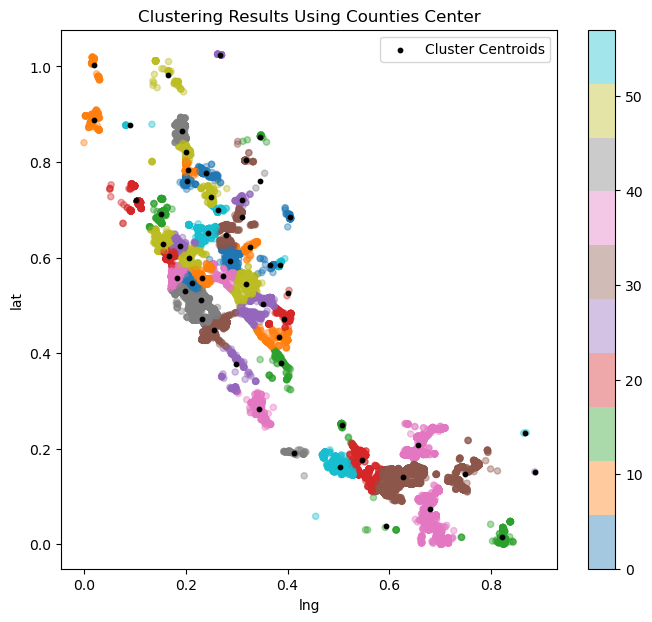

In [32]:
# plotting the result of clusters 
plt.style.use('default')
df_county.plot(kind="scatter", x="lng", y="lat", alpha=0.4, title='Clustering Results Using Counties Center',
              figsize=(8,7),
             c=df_county["label"], cmap=plt.get_cmap("tab10"), colorbar=True,
             sharex=False)
plt.scatter(kmeans_county.cluster_centers_[:,0], kmeans_county.cluster_centers_[:,1], c ='k', s=10, label='Cluster Centroids')
plt.savefig('result_kmeans.png', dpi=1500)
plt.legend()
plt.show()

 ## Part 3.2 Mini Batch K-means Algorithm </span>

### Part 3.2.1 Applying Mini Batch K-means Algorithm </span>

In [33]:
from sklearn.cluster import MiniBatchKMeans

In [36]:
# Applying mini batch kmeans 
## Assumption k=100 , batchsize=7*256

minibatch = MiniBatchKMeans(n_clusters=100, batch_size=7*256)

In [37]:
start = time.time()

minibatch.fit(X)

end = time.time()
print(end-start)

0.491748571395874


### Part 3.2.2 Selecting appropriate batch size </span>

In [70]:
# computing inertia for different batch size with K=50, K=75

minib_kmeans_per_k = [MiniBatchKMeans(n_clusters=k, batch_size=s).fit(X)
                for k in [50,75] for s in range(100,10001,100)]
inertias_mbk = [model.inertia_ for model in minib_kmeans_per_k]


In [73]:
# defining a function that computes execution time for different number of clusters

def exec_time_mbk(k,s):
    start = time.time()

    mbk = MiniBatchKMeans(n_clusters=k, batch_size=s).fit(X)
    mbk.fit(X)

    end = time.time()
    return end-start

In [74]:
# computing execution times for different batch size for K=50, K=75

mbk_times = [exec_time_mbk(k,s)
             for k in [50,75] for s in range(100,10001,100)]

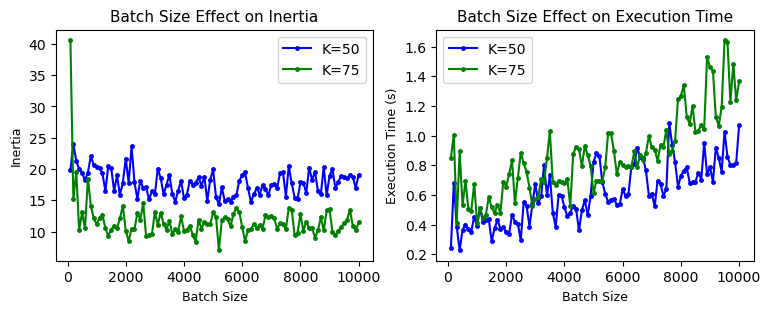

In [113]:
# plotting the effect of batch size 

fig,ax = plt.subplots(1,2)

ax[0].plot(range(100,10001,100), inertias_mbk[0:100], 'b.-', markersize=5, label= 'K=50')
ax[0].plot(range(100,10001,100), inertias_mbk[100:200], 'g.-', markersize=5, label= 'K=75')

ax[1].plot(range(100,10001,100), mbk_times[0:100], 'b.-', markersize=5, label= 'K=50')
ax[1].plot(range(100,10001,100), mbk_times[100:200], 'g.-', markersize=5, label= 'K=75')

ax[0].set_xlabel('Batch Size', fontsize=9)
ax[0].set_ylabel('Inertia',fontsize=9)
ax[0].set_title('Batch Size Effect on Inertia',fontsize=11)

ax[1].set_xlabel('Batch Size', fontsize=9)
ax[1].set_ylabel('Execution Time (s)',fontsize=9)
ax[1].set_title('Batch Size Effect on Execution Time',fontsize=11)

ax[0].legend()
ax[1].legend()

"""
plt.annotate('Elbow', xy=(15,inertias_1[2]),
             xytext=(30,100),
             arrowprops={'arrowstyle':'->', 'color' : 'blue'})
"""
plt.savefig('batch_size_effect', dpi=1500)
fig.set_size_inches([9,3])

plt.show()

In [107]:
# finiding batch size that leads to minimum inertia (K=75)

minib_kmeans_per_k[inertias_mbk.index(min(inertias_mbk[100:200]))]

MiniBatchKMeans(batch_size=5200, n_clusters=75)

In [106]:
# finiding batch size that leads to minimum inertia (K=75)

minib_kmeans_per_k[inertias_mbk.index(min(inertias_mbk[:100]))]

MiniBatchKMeans(batch_size=5200, n_clusters=50)

In [108]:
minib_kmeans_per_k_1 = [MiniBatchKMeans(n_clusters=k, batch_size=s).fit(X)
                for k in [50,75] for s in range(4000,6001,50)]
inertias_mbk_1 = [model.inertia_ for model in minib_kmeans_per_k_1]


In [109]:
mbk_times_1 = [exec_time_mbk(k,s)
             for k in [50,75] for s in range(4000,6001,50)]

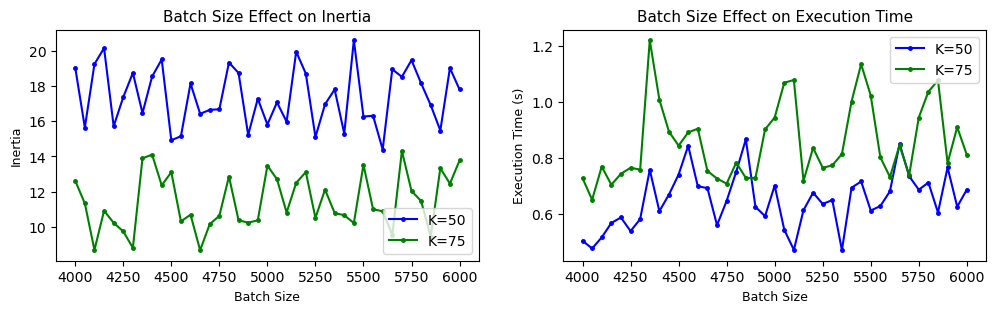

In [116]:
# plotting the effect of batch size 

fig,ax = plt.subplots(1,2)

ax[0].plot(range(4000,6001,50), inertias_mbk_1[0:41], 'b.-', markersize=5, label= 'K=50')
ax[0].plot(range(4000,6001,50), inertias_mbk_1[41:], 'g.-', markersize=5, label= 'K=75')

ax[1].plot(range(4000,6001,50), mbk_times_1[0:41], 'b.-', markersize=5, label= 'K=50')
ax[1].plot(range(4000,6001,50), mbk_times_1[41:], 'g.-', markersize=5, label= 'K=75')

ax[0].set_xlabel('Batch Size', fontsize=9)
ax[0].set_ylabel('Inertia',fontsize=9)
ax[0].set_title('Batch Size Effect on Inertia',fontsize=11)

ax[1].set_xlabel('Batch Size', fontsize=9)
ax[1].set_ylabel('Execution Time (s)',fontsize=9)
ax[1].set_title('Batch Size Effect on Execution Time',fontsize=11)

ax[0].legend()
ax[1].legend()

"""
plt.annotate('Elbow', xy=(15,inertias_1[2]),
             xytext=(30,100),
             arrowprops={'arrowstyle':'->', 'color' : 'blue'})
"""
#plt.savefig('batch_size_effect_2', dpi=1500)
fig.set_size_inches([12,3])

plt.show()

### Part 3.2.3 ٍExecution time for k =100  </span>

In [121]:
# computing execution time for different batch sizes with K=100

mbk_times_2 = [exec_time_mbk(k,s)
            for k in[100] for s in range(100,10000,100)]

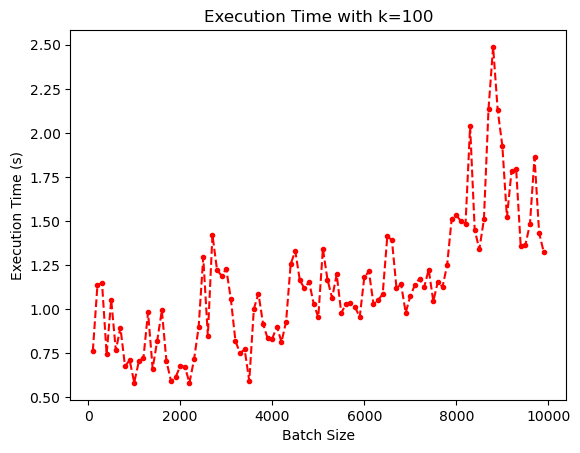

In [129]:
# plotting the Execution time for different batch sizes with K=100

plt.plot(range(100,10000,100), mbk_times_2, 'r.--')
plt.ylabel('Execution Time (s)')
plt.xlabel('Batch Size')
plt.title('Execution Time with k=100')
plt.show()

### Part 3.2.4 ٍ Determining Max no. of Clusters   </span>

In [135]:
# computing execution time for different no.of clusters with barch size =5200

mbk_times_3 = [exec_time_mbk(k,s)
            for k in range(1,1002, 50) for s in [5200]]

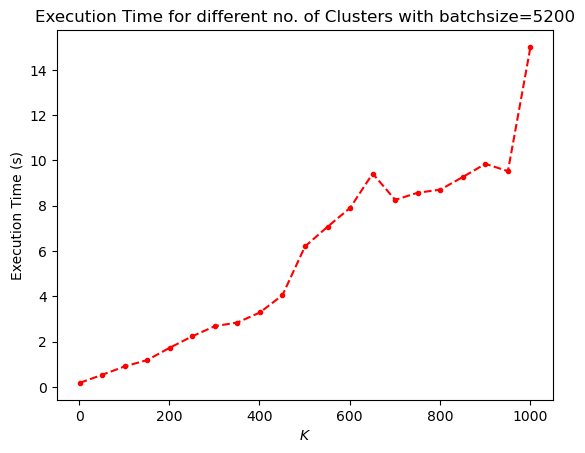

In [136]:
# plotting execution time for different no.of clusters with barch size =5200

plt.plot(range(1,1002, 50), mbk_times_3, 'r.--')
plt.ylabel('Execution Time (s)')
plt.xlabel('$K$ ')
plt.title('Execution Time for different no. of Clusters with batchsize=5200')
plt.show()

In [138]:
# Estimating execution time for different number of cluster 

from sklearn.linear_model import LinearRegression
lin_reg_1 = LinearRegression()

lin_reg_1.fit(np.arange(1,1002, 50).reshape(-1,1), np.array(mbk_times_3))
lin_reg_1.intercept_, lin_reg_1.coef_

(-0.6292905678501359, array([0.01260827]))

In [139]:
# Estimating execution time based on above linear regression model

estimated_times = lin_reg_1.predict(np.arange(0,100000,100).reshape(-1,1))

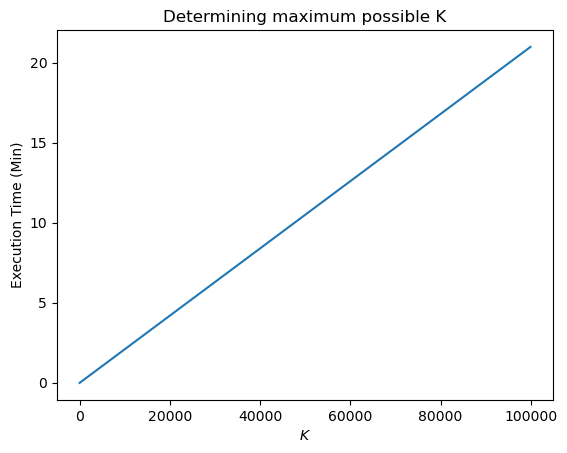

In [142]:
# plotting the estinated Execution time 

plt.plot(np.arange(0,100000,100), estimated_times/60)
plt.xlabel('$K$')
plt.ylabel('Execution Time (Min)')
plt.title('Determining maximum possible K')
plt.show()

### Part 3.2.5 ٍ Determining Optimum number of Clusters   </span>

In [154]:

minib_kmeans_per_k_4 = [MiniBatchKMeans(n_clusters=k, batch_size=5200).fit(X)
                for k in range(10,101,5)]
inertias_mbk_4 = [model.inertia_ for model in minib_kmeans_per_k_4]

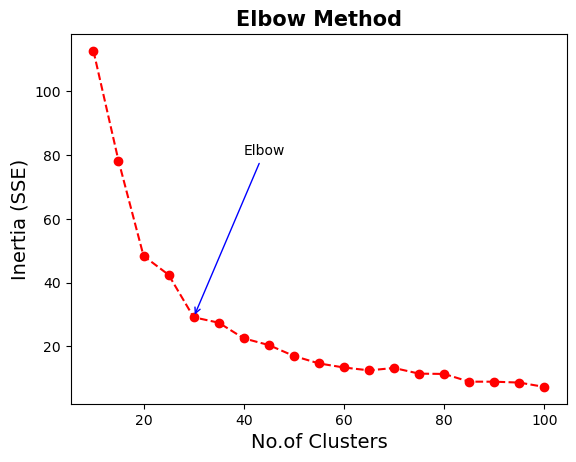

In [157]:
# Elbow Method

plt.plot(range(10,101,5), inertias_mbk_4, 'r.--', markersize=12)
plt.xlabel('No.of Clusters', fontsize=14)
plt.ylabel('Inertia (SSE)',fontsize=14)
plt.title('Elbow Method', fontsize=15, fontweight="bold")

plt.annotate('Elbow', xy=(30,inertias_mbk_4[4]),
             xytext=(40,80),
             arrowprops={'arrowstyle':'->', 'color' : 'blue'})

#plt.savefig('elbow.png', dpi=1500)
plt.show()

In [160]:
mbk = MiniBatchKMeans(n_clusters=30, batch_size=5200)

In [162]:
mbk.fit(X)

MiniBatchKMeans(batch_size=5200, n_clusters=30)

In [163]:
df_mbk = pd.DataFrame({'lng' : X[:,0],
                   'lat' : X[:,1],
                   'label' : mbk.labels_})

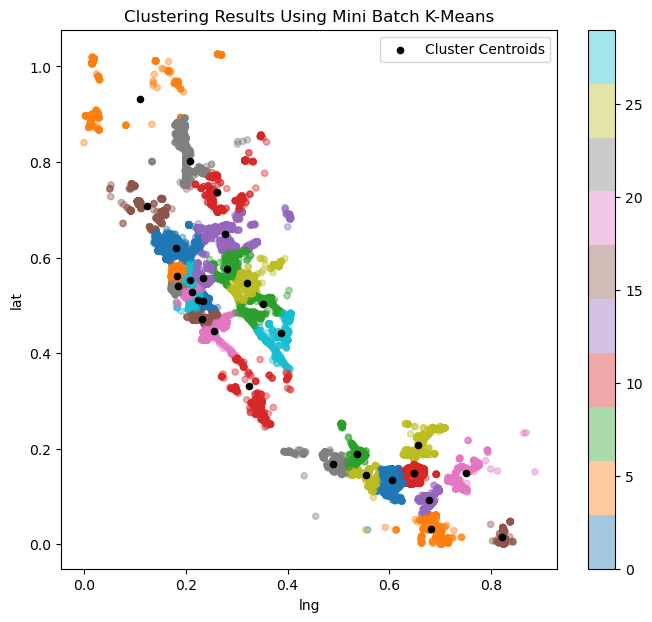

In [167]:
# plotting the result of clusters 
plt.style.use('default')
df_mbk.plot(kind="scatter", x="lng", y="lat", alpha=0.4, title='Clustering Results Using Mini Batch K-Means',
              figsize=(8,7),
             c=df_mbk["label"], cmap=plt.get_cmap("tab10"), colorbar=True,
             sharex=False)
plt.scatter(mbk.cluster_centers_[:,0], mbk.cluster_centers_[:,1], c ='k', s=20, label='Cluster Centroids')
#plt.savefig('result_kmeans.png', dpi=1500)
plt.legend()
plt.show()

 ## Part 3.3 DBSCAN Algorithm </span>

 ### Part 3.3.1 Applying DBSCAN  </span>

In [14]:
# Converting data point to meter unit

X_1 = X*10**6

In [21]:
from sklearn.cluster import DBSCAN

In [36]:
# Assumption : MinPts = 100 , eps=1000
start = time.time()

dbscan = DBSCAN(eps=1000, min_samples=100)
dbscan.fit(X_1)

end = time.time()
print(end-start)

2.708487033843994


In [287]:
def plot_dbscan(dbscan, X):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    fig,ax = plt.subplots()
    ax.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=300, cmap="Paired", zorder=12)
    ax.scatter(cores[:, 0], cores[:, 1], marker='*', s=10, c='k', label='Cores', zorder=13)
    ax.scatter(anomalies[:, 0], anomalies[:, 1],
                c="#03fc03", marker="x", s=100, label='Noise', alpha=0.3, zorder=10)
    ax.scatter(non_cores[:, 0], non_cores[:, 1],marker="P", s=180, c=dbscan.labels_[non_core_mask],  zorder=11)
    fig.set_size_inches([12,13])
    plt.legend()
    plt.show()

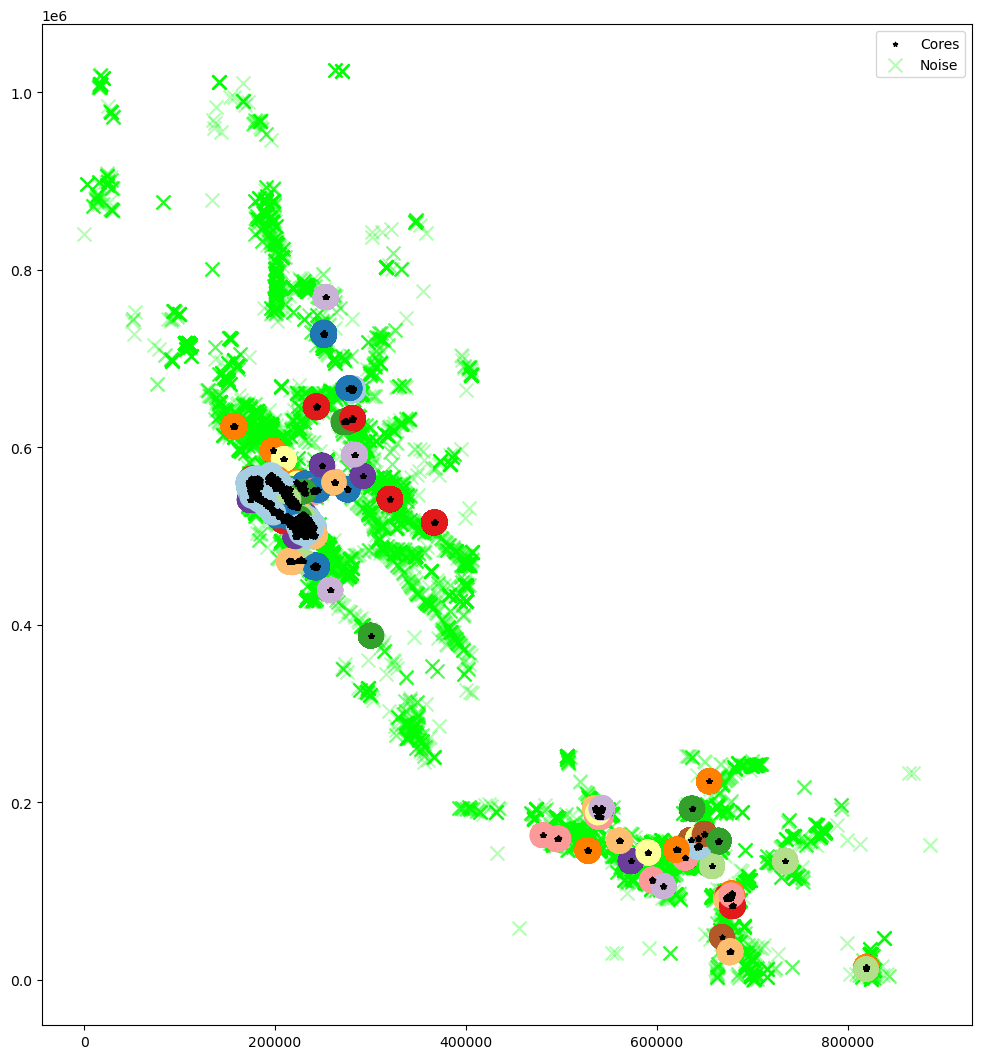

In [288]:
plot_dbscan(dbscan, X_1)

In [256]:
core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_mask[dbscan.core_sample_indices_] = True
anomalies_mask = dbscan.labels_ == -1
non_core_mask = ~(core_mask | anomalies_mask)

cores = dbscan.components_
anomalies = X_1[anomalies_mask]
non_cores = X_1[non_core_mask]

In [242]:
df_dbscan = pd.DataFrame({'lng' : X_1[:,0],
                   'lat' : X_1[:,1],
                   'label' : dbscan.labels_})

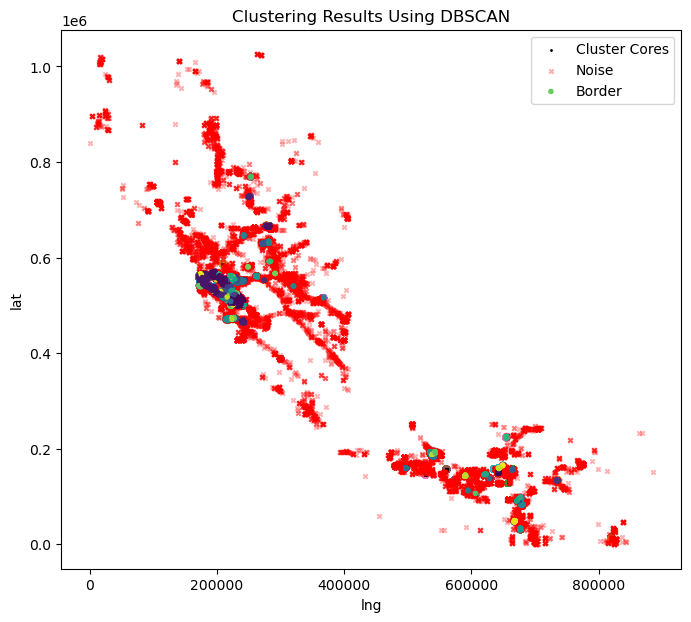

In [289]:
plt.style.use('default')
df_dbscan[df_dbscan.label!=-1].plot(kind="scatter", x="lng", y="lat", alpha=0.4, title='Clustering Results Using DBSCAN',
              figsize=(8,7),
             c=df_dbscan[df_dbscan.label!=-1]["label"], cmap=plt.get_cmap("tab10"), colorbar=False,
             sharex=False)
plt.scatter(dbscan.components_[:,0], dbscan.components_[:,1], c ='k', s=1, label='Cluster Cores')

plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=10, label='Noise', alpha=0.3)
plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".", label='Border')

#plt.savefig('result_kmeans.png', dpi=1500)
plt.legend()
plt.show()

 ### Part 3.3.2 Applying DBSCAN with min_samples=100  </span>

In [23]:
# Assumption : MinPts = 100 , eps=1000
start = time.time()

dbscan = DBSCAN(eps=1000, min_samples=100, n_jobs=-1)
dbscan.fit(X_1)

end = time.time()
print(end-start)

2.0430829524993896


In [24]:
labels = dbscan.labels_

In [35]:
# computing number of clusters

cluster_num = len(np.unique(labels)) -1 

In [30]:
# computing number of noise

noise_num = len(labels[labels==-1])

24965

 ### Part 3.3.3  Effect of eps  </span>

In [70]:
# Effect of eps on number of clusters,noises and execution time

n_cluster = np.zeros(20)
n_noise = np.zeros(20)
exec_time = np.zeros(20)

for i in range(20) :

    eps = 500 + i*100
    
    start = time.time()
    
    db = DBSCAN(eps=eps, min_samples=100)
    db.fit(X_1)
    
    end = time.time()
    
    exec_time[i] = end-start
    
    labels = db.labels_
    
    n_cluster[i] = len(np.unique(labels)) -1 
    n_noise[i] = len(labels[labels==-1])
    

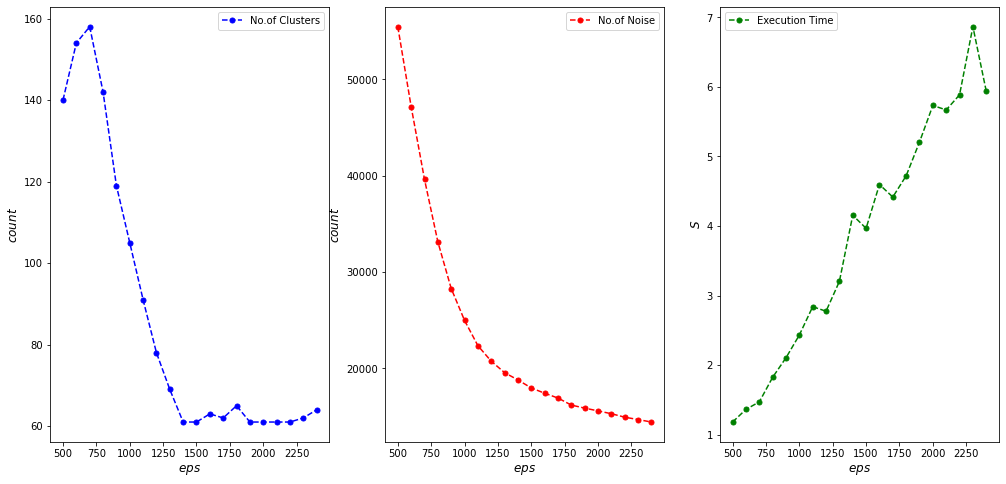

In [97]:
# Plotting the effect of eps on number of clusters,noises and execution time

fig,ax = plt.subplots(1,3)

ax[0].plot(np.arange(500,2500,100), n_cluster, 'b.--', markersize=10,label= 'No.of Clusters')

ax[1].plot(np.arange(500,2500,100),n_noise, 'r.--', markersize=10, label= 'No.of Noise')

ax[2].plot(np.arange(500,2500,100), exec_time, 'g.--', markersize=10, label= 'Execution Time')

ax[0].set_xlabel('$eps$', fontsize=12)
ax[0].set_ylabel('$count$',fontsize=12)

ax[1].set_xlabel('$eps$', fontsize=12)
ax[1].set_ylabel('$count$',fontsize=12)

ax[2].set_xlabel('$eps$', fontsize=12)
ax[2].set_ylabel('$S$',fontsize=12)

ax[0].legend()
ax[1].legend()
ax[2].legend()

"""
plt.annotate('Elbow', xy=(15,inertias_1[2]),
             xytext=(30,100),
             arrowprops={'arrowstyle':'->', 'color' : 'blue'})
"""
#plt.savefig('batch_size_effect', dpi=1500)
fig.set_size_inches([17,8])

plt.show()

 ### Part 3.3.4  Determining eps_100  </span>

In [98]:
# eps_100

n_cluster = np.zeros(20)
n_noise = np.zeros(20)
exec_time = np.zeros(20)

for i in range(20) :

    eps = 900 + i*25
    
    start = time.time()
    
    db = DBSCAN(eps=eps, min_samples=100)
    db.fit(X_1)
    
    end = time.time()
    
    exec_time[i] = end-start
    
    labels = db.labels_
    
    n_cluster[i] = len(np.unique(labels)) -1 
    n_noise[i] = len(labels[labels==-1])
    

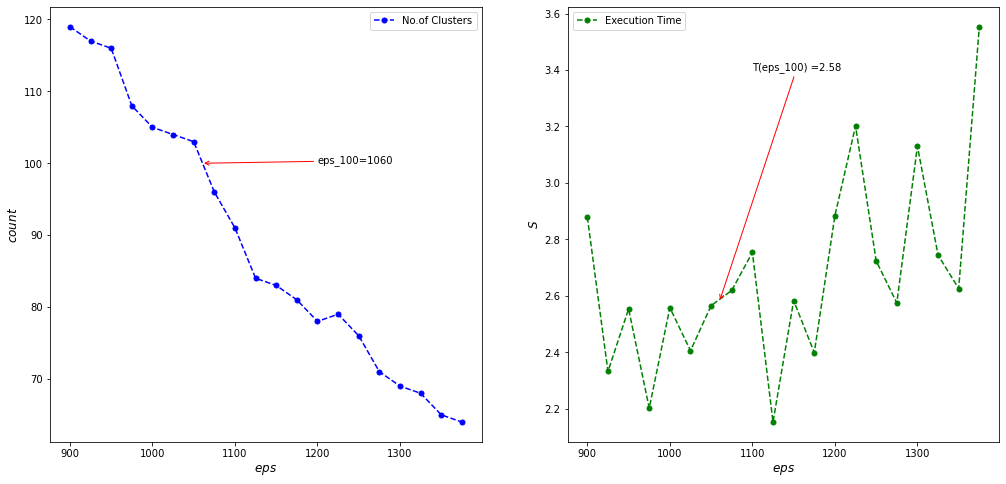

In [106]:
fig,ax = plt.subplots(1,2)

ax[0].plot(np.arange(900,1400,25), n_cluster, 'b.--', markersize=10,label= 'No.of Clusters')

ax[1].plot(np.arange(900,1400,25), exec_time, 'g.--', markersize=10, label= 'Execution Time')

ax[0].set_xlabel('$eps$', fontsize=12)
ax[0].set_ylabel('$count$',fontsize=12)

ax[1].set_xlabel('$eps$', fontsize=12)
ax[1].set_ylabel('$S$',fontsize=12)

ax[0].legend()
ax[1].legend()


ax[0].annotate('eps_100=1060', xy=(1060,100),
             xytext=(1200,100),
             arrowprops={'arrowstyle':'->', 'color' : 'red'})

ax[1].annotate('T(eps_100) =2.58', xy=(1060,2.58),
             xytext=(1100,3.4),
             arrowprops={'arrowstyle':'->', 'color' : 'red'})

#plt.savefig('batch_size_effect', dpi=1500)
fig.set_size_inches([17,8])

plt.show()

 ### Part 3.3.5 Applying OPTICS and Finding better value of eps  </span>

In [107]:
from sklearn.cluster import OPTICS

In [109]:
optics = OPTICS(min_samples=100)

In [110]:
start = time.time()

optics.fit(X_1)

end = time.time()
print(end-start)

443.33424401283264


/home/ali_p/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/cluster/_optics.py:904: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [111]:
reachability = optics.reachability_[optics.ordering_]

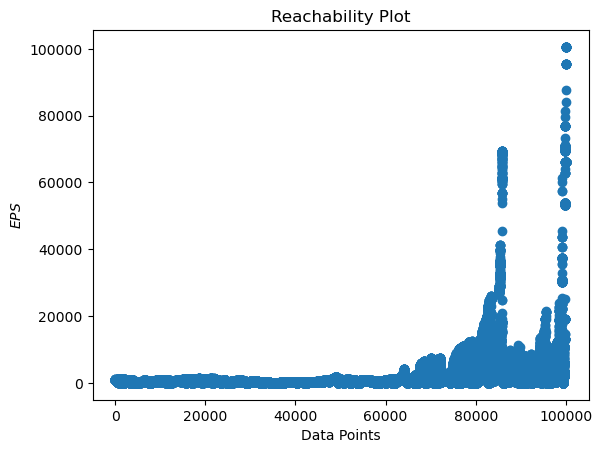

In [296]:
plt.scatter(range(len(reachability)), reachability)

plt.xlabel('Data Points')
plt.ylabel('$EPS$')
plt.title('Reachability Plot')
plt.show()

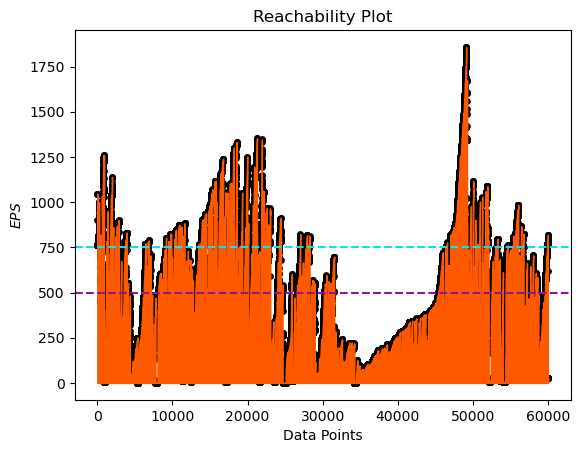

In [306]:
plt.scatter(range(len(reachability[:60000])), reachability[:60000], s=15, c='k')
plt.fill_between(range(len(reachability[:60000])), reachability[:60000], color='#ff5900')
plt.axhline(y=500, color='#91168d', linestyle='--')
plt.axhline(y=750, color='#09e3eb', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('$EPS$')
plt.title('Reachability Plot')
plt.show()

In [308]:
# esp = 750
# Assumption : MinPts = 100 , eps=750
start = time.time()

dbscan = DBSCAN(eps=750, min_samples=100)
dbscan.fit(X_1)

end = time.time()
print(end-start)

2.4775075912475586


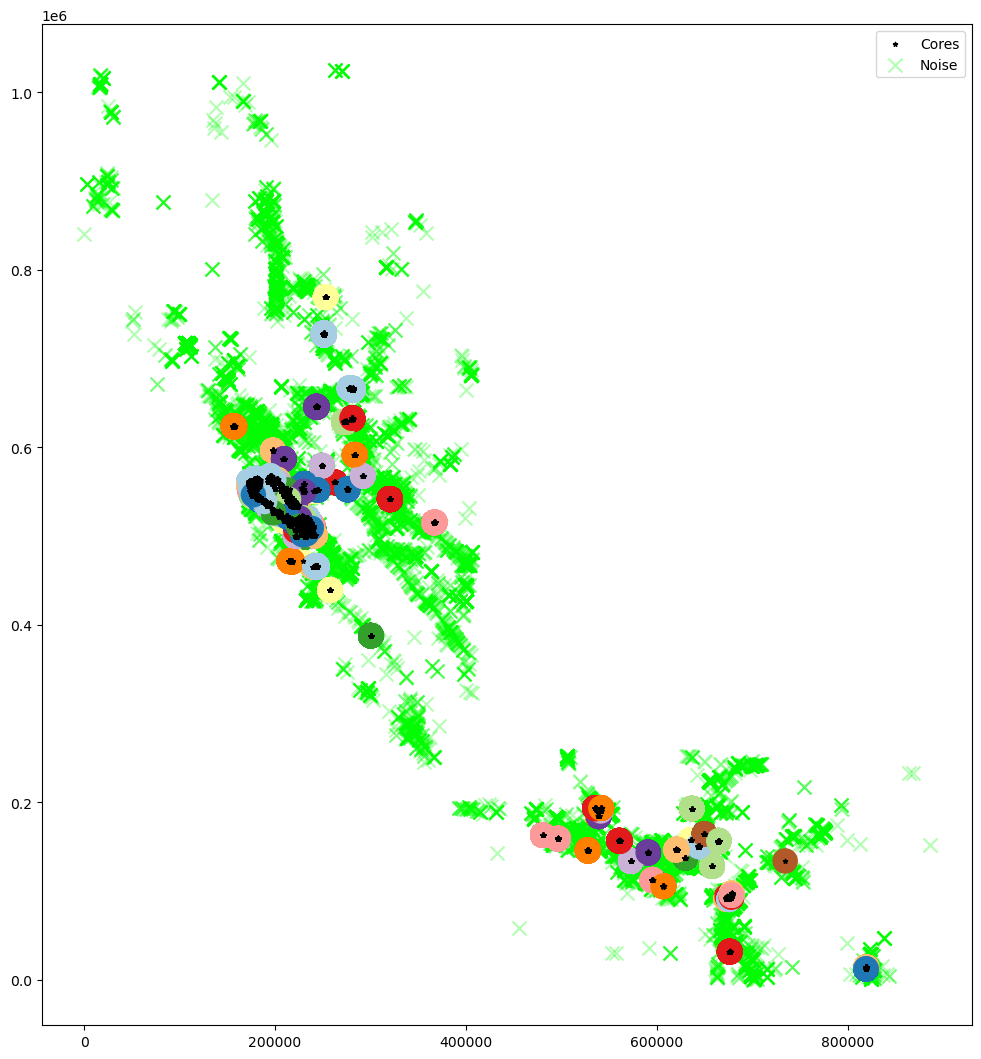

In [309]:
plot_dbscan(dbscan, X_1)

In [311]:
len(np.unique(dbscan.labels_)) -1 

144

In [312]:
# esp = 500
# Assumption : MinPts = 100 , eps=500
start = time.time()

dbscan = DBSCAN(eps=500, min_samples=100)
dbscan.fit(X_1)

end = time.time()
print(end-start)

1.32784104347229


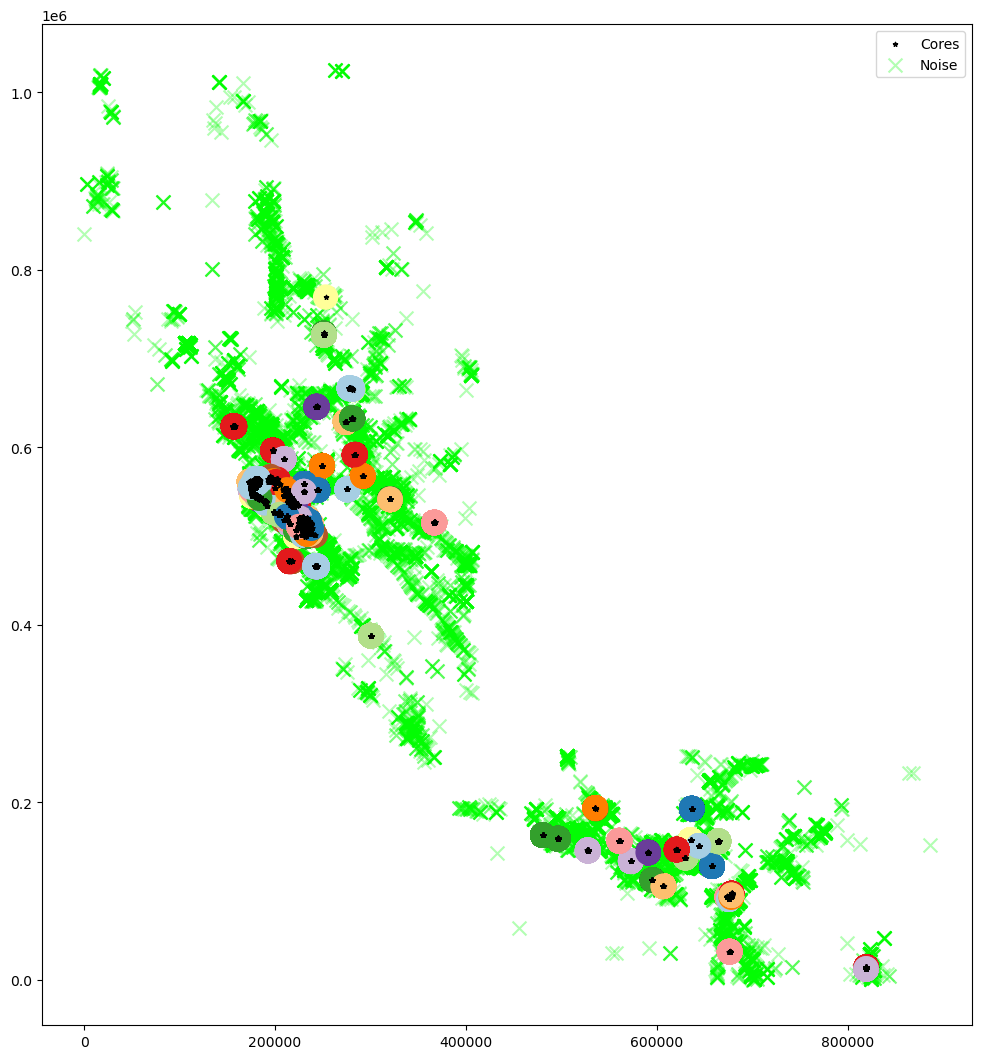

In [313]:
plot_dbscan(dbscan, X_1)

In [314]:
len(np.unique(dbscan.labels_)) -1 

140

 ## Part 3.4 Conclusion </span>

In [621]:
# effect of init param in mini batch kmeans

minib_kmeans_per_init = [MiniBatchKMeans(n_clusters=k, batch_size=5200, init= kind).fit(X)
                for kind in ['k-means++', 'random'] for k in range(10,81,10)]
inertias_mbk_init = [model.inertia_ for model in minib_kmeans_per_init]

In [623]:
# effect of init param in  kmeans

kmeans_per_init = [KMeans(n_clusters=k, init= kind).fit(X)
                for kind in ['k-means++', 'random'] for k in range(10,81,10)]
inertias_km_init = [model.inertia_ for model in kmeans_per_init]


In [622]:
minib_kmeans_per_init

[MiniBatchKMeans(batch_size=5200, n_clusters=10),
 MiniBatchKMeans(batch_size=5200, n_clusters=20),
 MiniBatchKMeans(batch_size=5200, n_clusters=30),
 MiniBatchKMeans(batch_size=5200, n_clusters=40),
 MiniBatchKMeans(batch_size=5200, n_clusters=50),
 MiniBatchKMeans(batch_size=5200, n_clusters=60),
 MiniBatchKMeans(batch_size=5200, n_clusters=70),
 MiniBatchKMeans(batch_size=5200, n_clusters=80),
 MiniBatchKMeans(batch_size=5200, init='random', n_clusters=10),
 MiniBatchKMeans(batch_size=5200, init='random', n_clusters=20),
 MiniBatchKMeans(batch_size=5200, init='random', n_clusters=30),
 MiniBatchKMeans(batch_size=5200, init='random', n_clusters=40),
 MiniBatchKMeans(batch_size=5200, init='random', n_clusters=50),
 MiniBatchKMeans(batch_size=5200, init='random', n_clusters=60),
 MiniBatchKMeans(batch_size=5200, init='random', n_clusters=70),
 MiniBatchKMeans(batch_size=5200, init='random', n_clusters=80)]

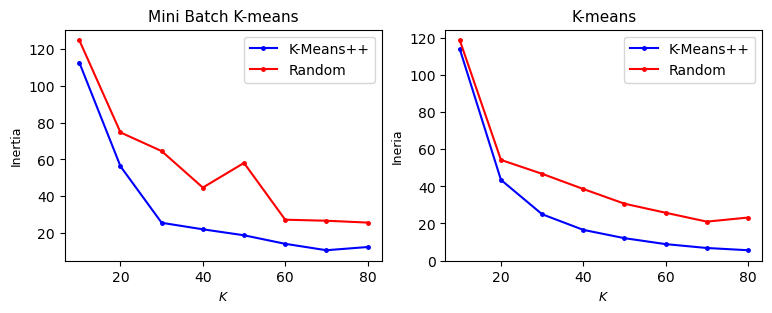

In [626]:
# plotting the effect of init param

fig,ax = plt.subplots(1,2)

ax[0].plot(range(10,81,10), inertias_mbk_init[0:8], 'b.-', markersize=5, label= 'K-Means++')
ax[0].plot(range(10,81,10), inertias_mbk_init[8:16], 'r.-', markersize=5, label= 'Random')

ax[1].plot(range(10,81,10), inertias_km_init[0:8], 'b.-', markersize=5, label= 'K-Means++')
ax[1].plot(range(10,81,10), inertias_km_init[8:16], 'r.-', markersize=5, label= 'Random')

ax[0].set_xlabel('$K$', fontsize=9)
ax[0].set_ylabel('Inertia',fontsize=9)
ax[0].set_title('Mini Batch K-means',fontsize=11)

ax[1].set_xlabel('$K$', fontsize=9)
ax[1].set_ylabel('Ineria',fontsize=9)
ax[1].set_title('K-means',fontsize=11)

ax[0].legend()
ax[1].legend()

#plt.savefig('batch_size_effect', dpi=1500)
fig.set_size_inches([9,3])

plt.show()

In [627]:
# effect of n_init param in mini batch kmeans

minib_kmeans_per_init = [MiniBatchKMeans(n_clusters=k, batch_size=5200, n_init= s).fit(X)
                for s in [5,10,15] for k in range(10,81,10)]
inertias_mbk_init = [model.inertia_ for model in minib_kmeans_per_init]

In [630]:
# effect of n_init param in  kmeans

kmeans_per_init = [KMeans(n_clusters=k, n_init= s).fit(X)
                for s in [5,10,15] for k in range(10,81,10)]
inertias_km_init = [model.inertia_ for model in kmeans_per_init]


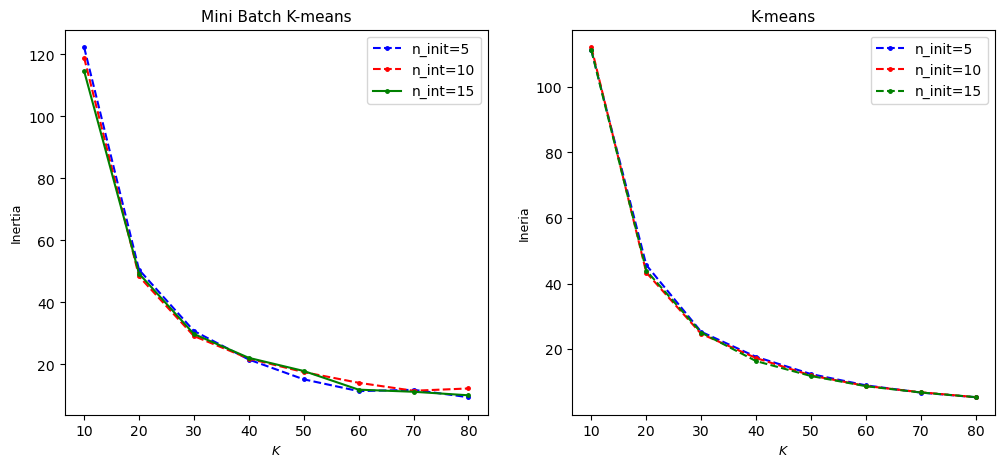

In [634]:
# plotting the effect of n_init param

fig,ax = plt.subplots(1,2)

ax[0].plot(range(10,81,10), inertias_mbk_init[0:8], 'b.--', markersize=5, label= 'n_init=5')
ax[0].plot(range(10,81,10), inertias_mbk_init[8:16], 'r.--', markersize=5, label= 'n_int=10')
ax[0].plot(range(10,81,10), inertias_mbk_init[16:24], 'g.-', markersize=5, label= 'n_int=15')

ax[1].plot(range(10,81,10), inertias_km_init[0:8], 'b.--', markersize=5, label= 'n_init=5')
ax[1].plot(range(10,81,10), inertias_km_init[8:16], 'r.--', markersize=5, label= 'n_init=10')
ax[1].plot(range(10,81,10), inertias_km_init[16:24], 'g.--', markersize=5, label= 'n_init=15')

ax[0].set_xlabel('$K$', fontsize=9)
ax[0].set_ylabel('Inertia',fontsize=9)
ax[0].set_title('Mini Batch K-means',fontsize=11)

ax[1].set_xlabel('$K$', fontsize=9)
ax[1].set_ylabel('Ineria',fontsize=9)
ax[1].set_title('K-means',fontsize=11)

ax[0].legend()
ax[1].legend()

#plt.savefig('batch_size_effect', dpi=1500)
fig.set_size_inches([12,5])

plt.show()

In [635]:
# effect of max_iter param in mini batch kmeans

minib_kmeans_per_init = [MiniBatchKMeans(n_clusters=k, batch_size=5200, max_iter= s).fit(X)
                for s in [250,300,350] for k in range(10,81,10)]
inertias_mbk_init = [model.inertia_ for model in minib_kmeans_per_init]

In [636]:
# effect of max_iter param in  kmeans

kmeans_per_init = [KMeans(n_clusters=k, max_iter= s).fit(X)
                for s in [250,300,350] for k in range(10,81,10)]
inertias_km_init = [model.inertia_ for model in kmeans_per_init]


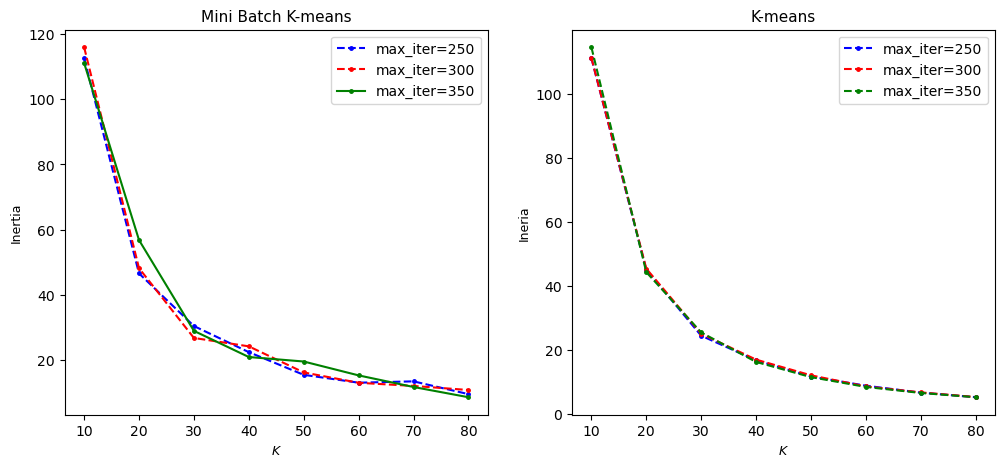

In [637]:
# plotting the effect of max_iter param

fig,ax = plt.subplots(1,2)

ax[0].plot(range(10,81,10), inertias_mbk_init[0:8], 'b.--', markersize=5, label= 'max_iter=250')
ax[0].plot(range(10,81,10), inertias_mbk_init[8:16], 'r.--', markersize=5, label= 'max_iter=300')
ax[0].plot(range(10,81,10), inertias_mbk_init[16:24], 'g.-', markersize=5, label= 'max_iter=350')

ax[1].plot(range(10,81,10), inertias_km_init[0:8], 'b.--', markersize=5, label= 'max_iter=250')
ax[1].plot(range(10,81,10), inertias_km_init[8:16], 'r.--', markersize=5, label= 'max_iter=300')
ax[1].plot(range(10,81,10), inertias_km_init[16:24], 'g.--', markersize=5, label= 'max_iter=350')

ax[0].set_xlabel('$K$', fontsize=9)
ax[0].set_ylabel('Inertia',fontsize=9)
ax[0].set_title('Mini Batch K-means',fontsize=11)

ax[1].set_xlabel('$K$', fontsize=9)
ax[1].set_ylabel('Ineria',fontsize=9)
ax[1].set_title('K-means',fontsize=11)

ax[0].legend()
ax[1].legend()

#plt.savefig('batch_size_effect', dpi=1500)
fig.set_size_inches([12,5])

plt.show()

 # Part 4. Scalability </span>

In [406]:
from sklearn.linear_model import LinearRegression

In [320]:
from sklearn.cluster import KMeans, MiniBatchKMeans

In [386]:
import time

In [425]:
# Function that computes execution time of partion based (kmeans & mini-batch kmeans) and denity based algorithm (DBSCAN)
## This function also fits a linear line to the execution times to makes rough estimation about Execution time of bigger sample

def scalability_SampleSize(algorithm, dataset) :
    
    # arraye of execution time
    exec_time_km = np.zeros(20)
    exec_time_mbk = np.zeros(20)
    exec_time_db = np.zeros(20)
    
    
    
    for i in range(20) :
        
        #smaple size
        s = 5000 + i*5000
        # randomly select i entries from data points
        index = np.random.choice(dataset.shape[0], s, replace=False) 
        X_rand = dataset[index]
    
    
    
        if algorithm == 'partion_based' :
        
        #clustrer == 'kmeans' :
            start = time.time()
            kmeans = KMeans(n_clusters=100, random_state=42)
            kmeans.fit(X_rand)
            end = time.time()
            exec_time_km[i] = end-start
            
        #clustrer == 'mini-batch-k-means' :
            start = time.time()
            mbk = MiniBatchKMeans(n_clusters=100, batch_size=5000)
            mbk.fit(X_rand)
            end = time.time()
            exec_time_mbk[i] = end-start
            
            
            
        elif algorithm =='density_based' :
            
            start = time.time()
            dbscan = DBSCAN(eps=1060, min_samples=100)
            dbscan.fit(X_rand)
            end = time.time()
            exec_time_db[i] =end-start
            
        
        
    if algorithm == 'partion_based' :
        
        # fitting linear line to extrapolate execution time
        
        #kmeans
        lin_reg_km = LinearRegression()
        lin_reg_km.fit(np.arange(5000,100001,5000).reshape(-1,1), exec_time_km)
        est_time_km = lin_reg_km.predict(np.arange(0,1000001,10000).reshape(-1,1))
        
        #mini-batch-kmeans
        lin_reg_mbk = LinearRegression()
        lin_reg_mbk.fit(np.arange(5000,100001,5000).reshape(-1,1), exec_time_mbk)
        est_time_mbk = lin_reg_mbk.predict(np.arange(0,1000001,10000).reshape(-1,1))        
        
        # plotting the results 
        fig,ax = plt.subplots(2,2)
        
        # kmeans computed time
        ax[0,0].plot([5000 + i*5000 for i in range(20)], exec_time_km, 'r.--', markersize=5, label='Computed Time')
        ax[0,0].set_xlabel('Sample Size')
        ax[0,0].set_ylabel('S')
        ax[0,0].set_title('K-Means Algorithm')
        ax[0,0].legend()
        
        #kmeans Estimated time
        ax[0,1].plot(np.arange(0,1000001,10000), est_time_km, color ='#ffae00',label='Estimated Time')
        ax[0,1].set_xlabel('Sample Size')
        ax[0,1].set_ylabel('S')
        ax[0,1].set_title('K-Means Algorithm')
        ax[0,1].legend()
    
        # mini-batch-kmeans computed time
        ax[1,0].plot([5000 + i*5000 for i in range(20)], exec_time_mbk, 'b.--', markersize=5, label='Computed Time')
        ax[1,0].set_xlabel('Sample Size')
        ax[1,0].set_ylabel('S')
        ax[1,0].set_title('Mini Batch Kmeans Algorithm')
        ax[1,0].legend()

        #mini-batch-kmeans estimated time
        ax[1,1].plot(np.arange(0,1000001,10000), est_time_mbk, color ='#af37f0', label='Estimated Time')
        ax[1,1].set_xlabel('Sample Size')
        ax[1,1].set_ylabel('S')
        ax[1,1].set_title('Mini Batch Kmeans Algorithm')
        ax[1,1].legend()
        
        fig.set_size_inches([12,13])
    
    
    elif algorithm =='density_based' :
        
        #fitiing line to extrapolate execution time
        # dbscan
        lin_reg_db = LinearRegression()
        lin_reg_db.fit(np.arange(5000,100001,5000).reshape(-1,1), exec_time_db)
        est_time_db = lin_reg_db.predict(np.arange(0,1000001,10000).reshape(-1,1))
        
        #plotting the result
        fig,ax = plt.subplots(1,2)
        
        #computed time
        ax[0].plot([5000 + i*5000 for i in range(20)], exec_time_db, 'r.--', markersize=8, label='Computed Time')
        ax[0].set_xlabel('Sample Size')
        ax[0].set_ylabel('S')
        ax[0].set_title('DBCSAN Algorithm')
        ax[0].legend() 
        
        # Estimated     
        ax[1].plot(np.arange(0,1000001,10000), est_time_db, color ='#af37f0', label='Estimated Time')
        ax[1].set_xlabel('Sample Size')
        ax[1].set_ylabel('S')
        ax[1].set_title('DBSCAN Algorithm')
        ax[1].legend()  
        
        fig.set_size_inches([12,5])
    
    plt.show()
                     
    

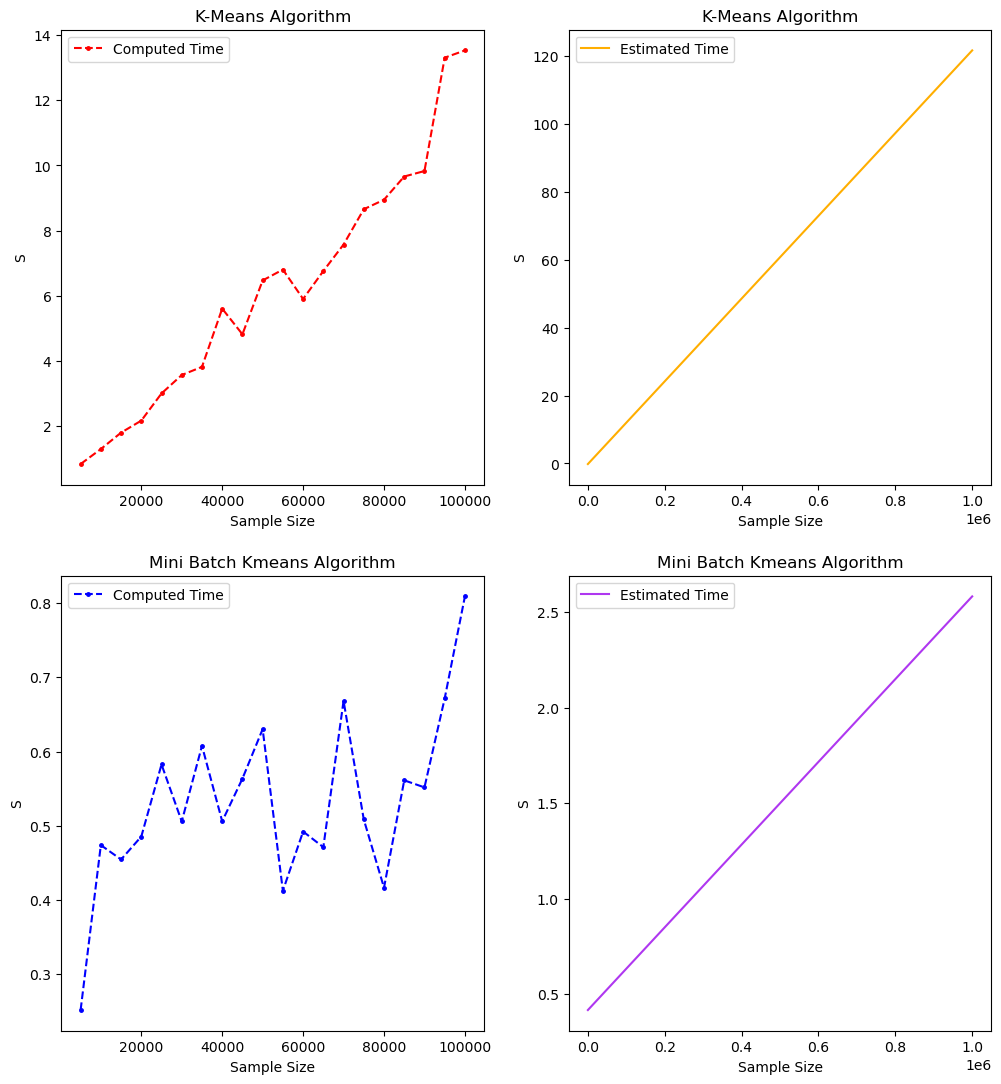

In [412]:
# Paritiob based algorithm 

scalability_SampleSize(algorithm='partion_based',dataset=X)

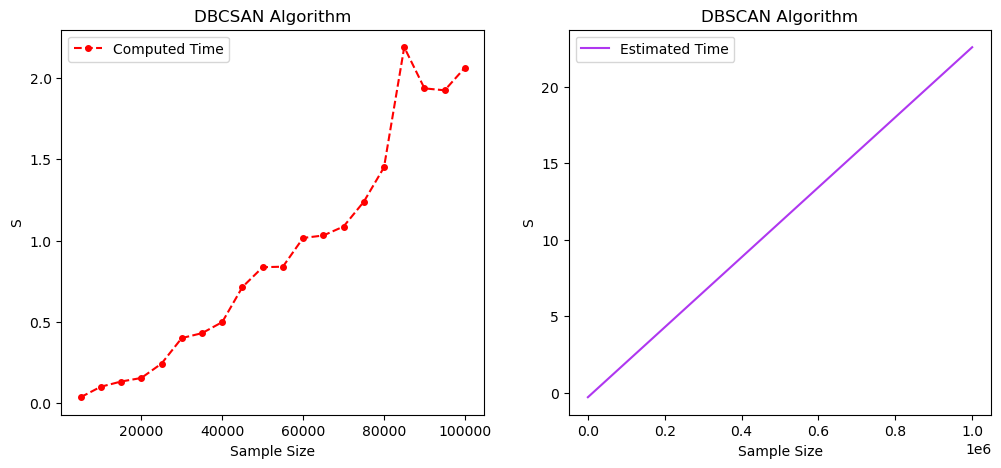

In [426]:
# Density-based algorithm

scalability_SampleSize(algorithm='density_based',dataset=X_1)

In [457]:
# Function that computes execution time of partion based (kmeans & mini-batch kmeans) for different K

def scalability_NoClusters(algorithm, k_max, step_size, dataset=X) :
    
    count = int(np.floor((k_max+3-2)/step_size))
    
    # arraye of execution time
    exec_time_km = np.zeros(count)
    exec_time_mbk = np.zeros(count)

    
    for i in range(count) :
        
        # no. of cluster
        k = 2 + i*step_size
        
        if algorithm == 'kmeans' :
            #clustrer == 'kmeans' :
            start = time.time()
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(X)
            end = time.time()
            exec_time_km[i] = end-start
        
        elif algorithm =='mini-batch-kmeans' :
            #clustrer == 'mini-batch-k-means' :
            start = time.time()
            mbk = MiniBatchKMeans(n_clusters=k, batch_size=5000)
            mbk.fit(X)
            end = time.time()
            exec_time_mbk[i] = end-start
            
    if exec_time_km.any() :
    #kmeans computed time
        plt.plot([2 + step_size*i for i in range(count)], exec_time_km, 'r.--', markersize=5, label='Computed Time')
        plt.xlabel('$K$')
        plt.ylabel('S')
        plt.title('Kmeans Algorithm')
        plt.legend()

    elif exec_time_mbk.any() :
    # mini-batch-kmeans computed time
        plt.plot([2 + step_size*i for i in range(count)], exec_time_mbk, 'b.--', markersize=5, label='Computed Time')
        plt.xlabel('$K$')
        plt.ylabel('S')
        plt.title('Mini Batch Kmeans Algorithm')
        plt.legend()

 
    
    plt.show()

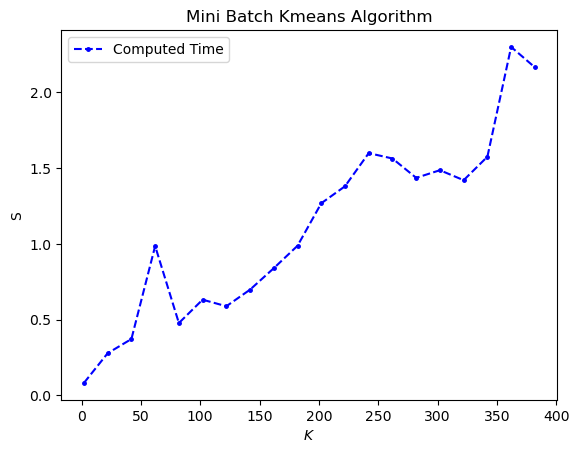

In [459]:
scalability_NoClusters(algorithm='mini-batch-kmeans', k_max=400, step_size=20)

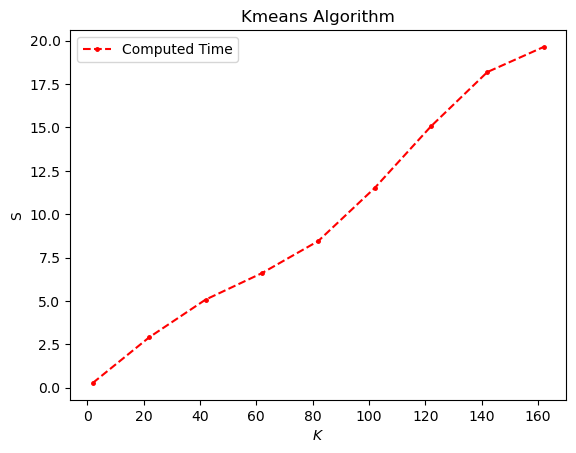

In [458]:
scalability_NoClusters(algorithm='kmeans', k_max=180, step_size=20)

 # Part 5. Finding Relations </span>

In [460]:
mbk = MiniBatchKMeans(n_clusters=100, batch_size=5200)

In [461]:
mbk.fit(X)

MiniBatchKMeans(batch_size=5200, n_clusters=100)

In [481]:
# centroid Coordiante (Based on the last digit of my id which is 2)

cent_lat = 35.64882595915578
cent_lng = -120.85374495176804

centroid_lat = hv(org_lat,org_lng, cent_lat,org_lng, unit='km')/1000
centroid_lng = hv(org_lat,org_lng, org_lat,cent_lng, unit='km')/1000

centroid = np.array([centroid_lng,centroid_lat]).reshape(1,-1)

In [507]:
df_mbk = pd.DataFrame({'lng' : X[:,0],
                   'lat' : X[:,1],
                   'label' : mbk.labels_})

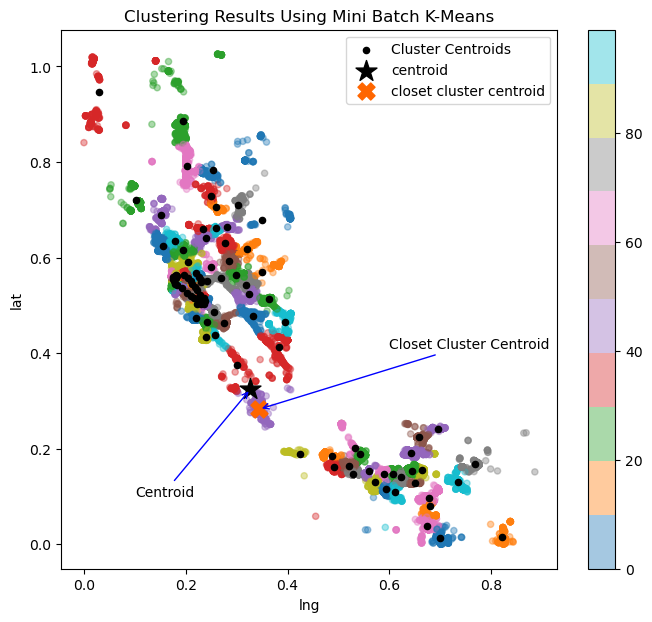

In [523]:
# plotting the result of clusters 
plt.style.use('default')
df_mbk.plot(kind="scatter", x="lng", y="lat", alpha=0.4, title='Clustering Results Using Mini Batch K-Means',
              figsize=(8,7),
             c=df_mbk["label"], cmap=plt.get_cmap("tab10"), colorbar=True,
             sharex=False)
plt.scatter(mbk.cluster_centers_[:,0], mbk.cluster_centers_[:,1], c ='k', s=20, label='Cluster Centroids')
plt.scatter(centroid[0,0], centroid[0,1], marker='*', c='k', s=250, label='centroid')
plt.scatter(mbk.cluster_centers_[40,0], mbk.cluster_centers_[40,1], marker='X', c='#ff6600', s=150, label='closet cluster centroid')

plt.annotate('Centroid', xy=(centroid[0,0],centroid[0,1]),
             xytext=(0.1,0.1),
             arrowprops={'arrowstyle':'->', 'color' : 'blue'})
plt.annotate('Closet Cluster Centroid', xy=(mbk.cluster_centers_[40,0],mbk.cluster_centers_[40,1]),
             xytext=(0.6,0.41),
             arrowprops={'arrowstyle':'->', 'color' : 'blue'})


#plt.savefig('result_kmeans.png', dpi=1500)
plt.legend()
plt.show()

In [501]:
# finding the distance of centroid to every clusters centroid

mbk.transform(centroid)
np. amin(mbk.transform(centroid))

0.045290746281510794

In [498]:
# finding index of closet cluster

index_closet_cluster = np. where(mbk.transform(centroid) == np. amin(mbk.transform(centroid)))
index_closet_cluster

(array([0]), array([40]))

In [506]:
mbk.cluster_centers_[40]

array([0.344162  , 0.28259216])

In [536]:
X_closet = X[mbk.labels_==40]

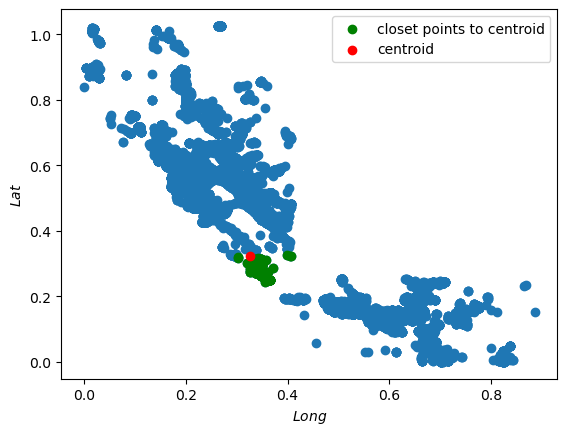

In [531]:

plt.scatter(X[:,0], X[:,1])
plt.scatter(X_closet[:,0], X_closet[:,1], c='g', label = 'closet points to centroid')
plt.scatter(centroid[0,0], centroid[0,1], c='r', label = 'centroid')
plt.xlabel('$Long$')
plt.ylabel('$Lat$')
plt.legend()
plt.show()